# Assignment 55: Pauli matrices and rotations

## Part 1 - Recap of Assignment 53

In [1]:
import functools
import numpy as np
from sympy import *
from sympy import sin, cos
from sympy.abc import a, b, c
from sympy.vector import CoordSys3D
from sympy.physics.quantum.dagger import Dagger

def random3DUnitVector(seed=None, test=False):
    unit_vector = 1.0 / np.sqrt([3.0, 3.0, 3.0])
    if not test:
        # set seed
        if seed is not None:
            np.random.seed(seed)
        # unscaled vector components
        vec = np.random.uniform(0.0, 1.0, 3)
        norm = np.sqrt(np.sum((vec*vec)))
        unit_vector = vec / norm
    return unit_vector

def generateRandom3DUnitVectors(seed=None, test=False, num=50):
    return np.array([np.array(random3DUnitVector(seed=None, test=False)) for n in range(num)])

def randomAngle(seed=None, n=1):
    if seed is not None:
            np.random.seed(seed)
    return np.random.uniform(0, 2*np.pi,n)

# define random angle
rangle = randomAngle(seed=42)[0]

# 50 random vectors
vectors = generateRandom3DUnitVectors(seed=7, test=False, num=50)
print("\nVectors: {}".format(vectors))

# one random unit vector
N = random3DUnitVector(seed=42)
print("\nRotation vector: {}".format(N))


Vectors: [[0.70900184 0.5458896  0.44645375]
 [0.68385953 0.68375381 0.25459158]
 [0.68201426 0.47330905 0.55752586]
 [0.01610273 0.75873616 0.65119901]
 [0.6350931  0.54382719 0.5485515 ]
 [0.40856876 0.7046986  0.58006159]
 [0.42095118 0.88439021 0.20162854]
 [0.44678097 0.56028238 0.69747432]
 [0.81824331 0.20808296 0.5358912 ]
 [0.69709176 0.05465801 0.7148955 ]
 [0.17647515 0.06732179 0.98200015]
 [0.74528059 0.62392592 0.23510273]
 [0.11919667 0.8350213  0.53715137]
 [0.23875149 0.96874743 0.06727654]
 [0.78766203 0.22415769 0.57388314]
 [0.38180663 0.63701753 0.66965093]
 [0.14729105 0.77255988 0.61762171]
 [0.65764244 0.62637265 0.41852565]
 [0.97385725 0.09348245 0.20703402]
 [0.08887674 0.63931088 0.76379482]
 [0.2880003  0.87959279 0.37864541]
 [0.44796237 0.86535265 0.22470984]
 [0.62967812 0.05851793 0.77464903]
 [0.96842782 0.24919792 0.00692497]
 [0.62615342 0.54276159 0.55976937]
 [0.90342283 0.08673175 0.41988665]
 [0.10819562 0.80594432 0.58202015]
 [0.72166098 0.138

In [2]:
quaternions = [np.concatenate((np.array([0]), v)) for v in vectors]
quaternions

[array([0.        , 0.70900184, 0.5458896 , 0.44645375]),
 array([0.        , 0.68385953, 0.68375381, 0.25459158]),
 array([0.        , 0.68201426, 0.47330905, 0.55752586]),
 array([0.        , 0.01610273, 0.75873616, 0.65119901]),
 array([0.        , 0.6350931 , 0.54382719, 0.5485515 ]),
 array([0.        , 0.40856876, 0.7046986 , 0.58006159]),
 array([0.        , 0.42095118, 0.88439021, 0.20162854]),
 array([0.        , 0.44678097, 0.56028238, 0.69747432]),
 array([0.        , 0.81824331, 0.20808296, 0.5358912 ]),
 array([0.        , 0.69709176, 0.05465801, 0.7148955 ]),
 array([0.        , 0.17647515, 0.06732179, 0.98200015]),
 array([0.        , 0.74528059, 0.62392592, 0.23510273]),
 array([0.        , 0.11919667, 0.8350213 , 0.53715137]),
 array([0.        , 0.23875149, 0.96874743, 0.06727654]),
 array([0.        , 0.78766203, 0.22415769, 0.57388314]),
 array([0.        , 0.38180663, 0.63701753, 0.66965093]),
 array([0.        , 0.14729105, 0.77255988, 0.61762171]),
 array([0.    

In [3]:
# construct conjugate quarternions
p = np.concatenate((np.array([np.cos(rangle)]), np.sin(rangle) * N)) 
p_inv = np.concatenate((np.array([np.cos(rangle)]), -np.sin(rangle) * N)) 
p, p_inv

(array([-0.70506063,  0.21130634,  0.53636967,  0.41297301]),
 array([-0.70506063, -0.21130634, -0.53636967, -0.41297301]))

In [4]:
# define quaternion multiplication
def multiply_quaternions(P, Q):
    r0 = np.array([P[0] * Q[0] - np.dot(P[1:], Q[1:])])
    r1 = Q[0] * P[1:] + P[0] * Q[1:] + np.cross(P[1:], Q[1:])
    return(np.concatenate((r0, r1)))

In [5]:
rotated_via_quaternions = np.array([q[1:] for q in [multiply_quaternions(p, multiply_quaternions(q, p_inv)) for q in quaternions]])

# Part 2

## Implementing the rotations using the Pauli matrix representation

In [6]:
# define the pauli spin matrices
import numpy as np
import sympy as sp
from sympy import *
from sympy.physics.quantum.dagger import Dagger

def pauli_matrix(s11, s12, s21, s22):
    return Matrix([[s11, s12], [s21, s22]])

args1, args2, args3, args4 = list(zip((1,0,0,1),(0,1,1,0),(0, -sp.I, sp.I, 0),(1,0,0,-1)))

p0, p1, p2, p3 = list(map(pauli_matrix, args1, args2, args3, args4))

In [7]:
p0

Matrix([
[1, 0],
[0, 1]])

In [8]:
p1

Matrix([
[0, 1],
[1, 0]])

In [9]:
p2

Matrix([
[0, -I],
[I,  0]])

In [10]:
p3

Matrix([
[1,  0],
[0, -1]])

In [11]:
# define the basis quaternions in matrix form
e, i, j, k = [f*g for f, g in list(zip((1, -sp.I, -sp.I, -sp.I), (p0, p1, p2, p3)))]

In [12]:
e

Matrix([
[1, 0],
[0, 1]])

In [13]:
i

Matrix([
[ 0, -I],
[-I,  0]])

In [14]:
j

Matrix([
[0, -1],
[1,  0]])

In [15]:
k

Matrix([
[-I, 0],
[ 0, I]])

In [16]:
# to express p, p_inv in this representation, we multiply their components by the corresponding 
# elements of the representation: e, i, j, k
# we then sum over the resulting matrices to obtain a single matrix representation of each of these
to_pauli_matrix = lambda q: [q_ * t for q_, t in list(zip(list(q),(e, i, j, k)))]

In [17]:
P = functools.reduce(lambda m1, m2: m1 + m2, to_pauli_matrix(p))
P

Matrix([
[ -0.70506063397579 - 0.41297301158258*I, -0.536369671723189 - 0.211306340126438*I],
[0.536369671723189 - 0.211306340126438*I,   -0.70506063397579 + 0.41297301158258*I]])

In [18]:
P_inv = functools.reduce(lambda m1, m2: m1 + m2, to_pauli_matrix(p_inv))
P_inv

Matrix([
[  -0.70506063397579 + 0.41297301158258*I, 0.536369671723189 + 0.211306340126438*I],
[-0.536369671723189 + 0.211306340126438*I,  -0.70506063397579 - 0.41297301158258*I]])

In [19]:
# check that p, p_inv are still conjugate and inverse
simplify(P * P_inv) == simplify(P_inv * P) == Matrix([[1,0],[0,1]])

True

In [20]:
# turn the quaternions in the Pauli spin matrix representation
matrices = [simplify(P * functools.reduce(lambda m1, m2: m1 + m2, to_pauli_matrix(q)))  * P_inv for q in quaternions]

In [21]:
matrices[0]

Matrix([
[ (-0.70506063397579 + 0.41297301158258*I)*(-0.626988554112648 + 0.579714110483669*I) + (-0.536369671723189 + 0.211306340126438*I)*(0.18642514830179 + 0.485862704062079*I),  (-0.70506063397579 - 0.41297301158258*I)*(0.18642514830179 + 0.485862704062079*I) + (-0.626988554112648 + 0.579714110483669*I)*(0.536369671723189 + 0.211306340126438*I)],
[(-0.70506063397579 + 0.41297301158258*I)*(-0.18642514830179 + 0.485862704062079*I) + (-0.626988554112648 - 0.579714110483669*I)*(-0.536369671723189 + 0.211306340126438*I), (-0.18642514830179 + 0.485862704062079*I)*(0.536369671723189 + 0.211306340126438*I) + (-0.70506063397579 - 0.41297301158258*I)*(-0.626988554112648 - 0.579714110483669*I)]])

In [22]:
# define a trace function that automatically simplifies the resulting sympy expression
def trace(M):
    return simplify(Trace(M))

In [23]:
# define func to map pauli spin representation back to a four - vector
to_four_vector = lambda t, q: Rational(1, 2) * trace(Dagger(t) * q)

In [24]:
rotated_via_matrices = np.array([[to_four_vector(t, q) for t in (e, i, j, k)][1:] for q in matrices])

In [25]:
np.max(np.abs(rotated_via_matrices - rotated_via_quaternions))

2.22044604925031e-16

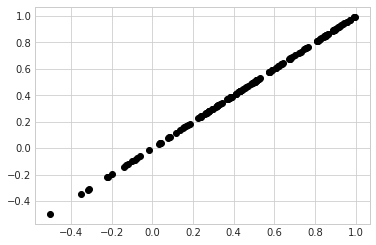

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(rotated_via_quaternions, rotated_via_matrices, 'o', color='black');
